#### Computing Factorials

For any $n \in \mathbb{N}$
$$
n! = n \dot (n - 1)!
$$

#### Recursive Version of Computing Factorials
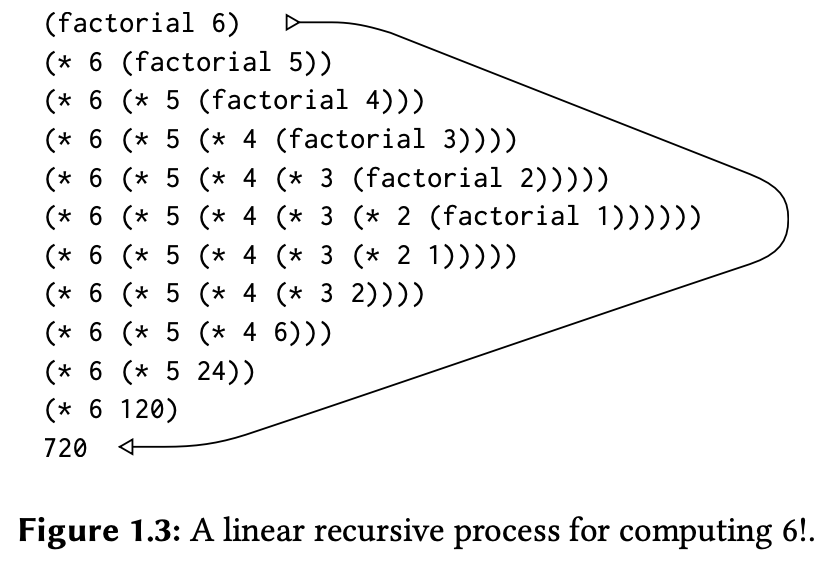

In [49]:
(define (factorial n) (if (= n 1) 1 (* n (factorial (- n 1)))))

(printf "factorial(~a) = ~a\n" 1 (factorial 1))
(printf "factorial(~a) = ~a\n" 2 (factorial 2))
(printf "factorial(~a) = ~a\n" 3 (factorial 3))
(printf "factorial(~a) = ~a\n" 4 (factorial 4))
(printf "factorial(~a) = ~a\n" 5 (factorial 5))

factorial(1) = 1
factorial(2) = 2
factorial(3) = 6
factorial(4) = 24
factorial(5) = 120


In [52]:
(require racket/trace)
(trace factorial)
(factorial 5)

>(factorial 5)
> (factorial 4)
> >(factorial 3)
> > (factorial 2)
> > >(factorial 1)
< < <1
< < 2
< <6
< 24
<120


120

#### Iterative Process of Computing Factorials
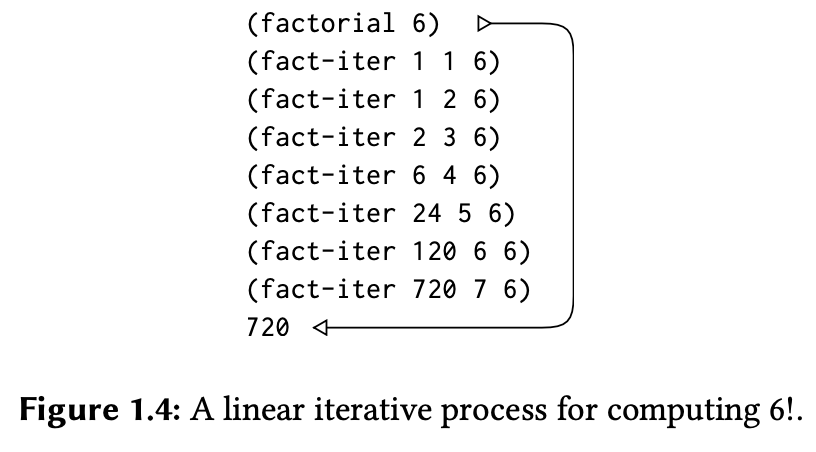

In [53]:
(define (fact-iter product counter max-count)
    (if (> counter max-count)
        product
        (fact-iter (* counter product)
                   (+ counter 1)
                   max-count)))
(define (factorial n)
    (fact-iter 1 1 n))

In [54]:
(require racket/trace)
(trace fact-iter)
(factorial 5)

>(fact-iter 1 1 5)
>(fact-iter 1 2 5)
>(fact-iter 2 3 5)
>(fact-iter 6 4 5)
>(fact-iter 24 5 5)
>(fact-iter 120 6 5)
<120


120

#### Personal Observation
- Recursion calls function "recursively" inside itself. It conjures some sort of recursive depth.
- Meanwhile, Iteration doesn't have depth.

## Simplication of Definition

### Recursive Process
- A process of recurring procedure calls through generation of deferred procedures.
- At some point, it must have a terminating condition.

#### Example:
```racket
>(factorial 5)
> (factorial 4)
> >(factorial 3)
> > (factorial 2)
> > >(factorial 1)
< < <1
< < 2
< <6
< 24
<120
```

### Iterative Process
- A process of recurring procedure calls through tracking a fixed number of states variables.
- At some point, it must have a terminating condition.

#### Example:
```racket
>(fact-iter 1 1 5)
>(fact-iter 1 2 5)
>(fact-iter 2 3 5)
>(fact-iter 6 4 5)
>(fact-iter 24 5 5)
>(fact-iter 120 6 5)
<120
```

### Advantages of Iteration over Recursion
- Iteration neither does grow nor shrink

### Crucial Difference between Iteration and Recursion
- The information tracked at the former remains static, the information tracked at the latter dynamically grows.

#### Question: 
- What is *tail-recursion*?

#### Exercise 1.9:

Each of the following two procedures defines a method for adding two positive integers in terms of the procedures `inc`, which increments its argument by 1, and `dec`, which decrements its argument by 1.

```lisp
(define (+ a b)
  (if (= a 0) b (inc (+ (dec a) b))))

(define (+ a b)
  (if (= a 0) b (+ (dec a) (inc b))))
```

Using the substitution model, illustrate the process generated by each procedure in evaluating `(+ 4 5)`. Are these processes iterative or recursive?


In [59]:
(require racket/trace)

(define (inc a) (+ a 1))
(define (dec a) (- a 1))

(define (plus a b)
  (if (= a 0) b (inc (plus (dec a) b))))

(trace plus)
(plus 5 5)

>(plus 5 5)
> (plus 4 5)
> >(plus 3 5)
> > (plus 2 5)
> > >(plus 1 5)
> > > (plus 0 5)
< < < 5
< < <6
< < 7
< <8
< 9
<10


10

In [60]:
(define (plus a b)
  (if (= a 0) b (plus (dec a) (inc b))))

(trace plus)
(plus 5 5)

>(plus 5 5)
>(plus 4 6)
>(plus 3 7)
>(plus 2 8)
>(plus 1 9)
>(plus 0 10)
<10


10

#### Answer:
The first procedure is recursion since it keeps deferring `plus` until the proper termination condition `if (= 0 b) b` was reached

```
>(plus 5 5)
> (plus 4 5)
> >(plus 3 5)
> > (plus 2 5)
> > >(plus 1 5)
> > > (plus 0 5)
< < < 5
< < <6
< < 7
< <8
< 9
<10
```

The second procedure is an iteration given that it only update the states `a` and `b` by incrementing `a` and decrementing `b` until the termination condition was reached which is `if (= a 0) a`

```
>(plus 5 5)
>(plus 4 6)
>(plus 3 7)
>(plus 2 8)
>(plus 1 9)
>(plus 0 10)
<10
```

#### Exercise 1.10:

The following procedure computes a mathematical function called Ackermann's function.

```lisp
(define (A x y)
  (cond ((= y 0) 0)
        ((= x 0) (* 2 y))
        ((= y 1) 2)
        (else (A (- x 1) (A x (- y 1))))))
```

What are the values of the following expressions?

```lisp
(A 1 10)
(A 2 4)
(A 3 3)
```

Consider the following procedures, where `A` is the procedure defined above:

```lisp
(define (f n) (A 0 n))
(define (g n) (A 1 n))
(define (h n) (A 2 n))
(define (k n) (* 5 n n))
```

Give concise mathematical definitions for the functions computed by the procedures `f`, `g`, and `h` for positive integer values of `n`. For example, `(k n)` computes $5n^2$.

In [70]:
(define (A x y)
  (cond ((= y 0) 0)
        ((= x 0) (* 2 y))
        ((= y 1) 2)
        (else (A (- x 1) (A x (- y 1))))))

(printf "(A 1 10) = ~a\n" (A 1 10))
(printf "(A 2 4) = ~a\n" (A 2 4))
(printf "(A 3 3) = ~a\n" (A 3 3))

(A 1 10) = 1024
(A 2 4) = 65536
(A 3 3) = 65536


#### Definition of `(f n)`

$$
f(n) = 2n
$$

In [65]:
(define (f n) (A 0 n))
( printf "(f 1) = ~a\n" (f 1))
( printf "(f 2) = ~a\n" (f 2))
( printf "(f 3) = ~a\n" (f 3))
( printf "(f 4) = ~a\n" (f 4))
( printf "(f 5) = ~a\n" (f 5))

(f 1) = 2
(f 2) = 4
(f 3) = 6
(f 4) = 8
(f 5) = 10


#### Mathematical definition of `(g n)`

```lisp
(define (g n ) (A 1 n))
```

Clearly:

$$
g(n) = 2^n
$$

In [72]:
(define (g n) (A 1 n))
( printf "(g 1) = ~a\n" (g 1))
( printf "(g 2) = ~a\n" (g 2))
( printf "(g 3) = ~a\n" (g 3))
( printf "(g 4) = ~a\n" (g 4))
( printf "(g 5) = ~a\n" (g 5))
( printf "(g 6) = ~a\n" (g 6))

(g 1) = 2
(g 2) = 4
(g 3) = 8
(g 4) = 16
(g 5) = 32
(g 6) = 64


#### Mathematical definition of `(h n)`

```lisp
(define (h n) (A 2 n))
```

Clearly:

$$
h(n) = A(1, A(2, n - 1))
$$

Where $A$ is the Ackerman Function

In [74]:
(define (h n) (A 2 n))
( printf "(h 1) = ~a\n" (h 1))
( printf "(h 2) = ~a\n" (h 2))
( printf "(h 3) = ~a\n" (h 3))
( printf "(h 4) = ~a\n" (h 4))
( printf "(h 5) = ~a\n" (h 5))

(h 1) = 2
(h 2) = 4
(h 3) = 16
(h 4) = 65536
(h 5) = 20035299304068464649790723515602557504478254755697514192650169737108940595563114530895061308809333481010382343429072631818229493821188126688695063647615470291650418719163515879663472194429309279820843091048559905701593189596395248633723672030029169695921561087649488892540908059114570376752085002066715637023661263597471448071117748158809141357427209671901518362825606180914588526998261414250301233911082736038437678764490432059603791244909057075603140350761625624760318637931264847037437829549756137709816046144133086921181024859591523801953310302921628001605686701056516467505680387415294638422448452925373614425336143737290883037946012747249584148649159306472520151556939226281806916507963810641322753072671439981585088112926289011342377827055674210800700652839633221550778312142885516755540733451072131124273995629827197691500548839052238043570458481979563931578535100189920000241419637068135598404640394721940160695176901561197269823378900176

##### Mathematical Definition of `(k n)`

```lisp
(define (k n) (* 5 n n))
```

Clearly:

$$
k(n) = 5n^2
$$

In [75]:
(define (k n) (* 5 n n))
( printf "(k 1) = ~a\n" (k 1))
( printf "(k 2) = ~a\n" (k 2))
( printf "(k 3) = ~a\n" (k 3))
( printf "(k 4) = ~a\n" (k 4))
( printf "(k 5) = ~a\n" (k 5))

(k 1) = 5
(k 2) = 20
(k 3) = 45
(k 4) = 80
(k 5) = 125
